In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

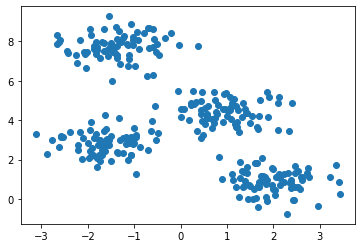

In [2]:
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
scat = plt.scatter(X[:,0], X[:,1])
print(scat)

C:\Users\DK200\anaconda3\envs\marketingseminar\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  "KMeans is known to have a memory leak on Windows "


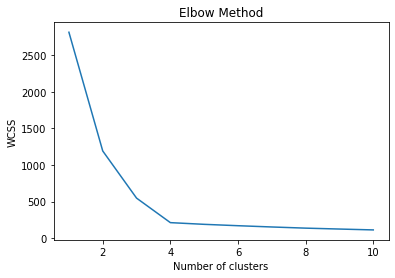

In [3]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

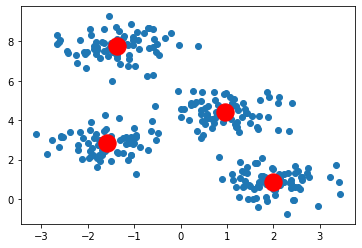

[ 1.98258281  0.94973532 -1.37324398 -1.58438467]
[0.86771314 4.41906906 7.75368871 2.83081263]


In [4]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X) # Compute cluster centers and predict cluster index for each sample
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()
print(kmeans.cluster_centers_[:, 0]) # x coordinates clusters
print(kmeans.cluster_centers_[:, 1]) # y coordinates clusters

Prediction tryout

In [5]:
Xnew, ynew = make_blobs(n_samples=3, centers=4, cluster_std=0.60, random_state=0)
print(Xnew)
print(ynew)

[[-1.07028138  2.99088727]
 [ 0.91433877  4.55014643]
 [ 2.14169366  1.77022776]]
[2 0 1]


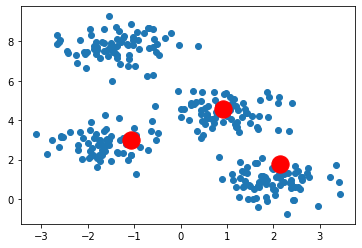

In [6]:
plt.scatter(X[:,0], X[:,1])
plt.scatter(Xnew[:,0], Xnew[:,1], s=300, c='red')
plt.show()

In [7]:
# prints the cluster with lowest euclidian distance to newpoint
def NewPointCluster(newpoint):
    list = [0]*4
    for i in range(0, 4):
        clust = kmeans.cluster_centers_[i,:]
        dist = np.linalg.norm(clust-newpoint)
        list[i] = dist
   
    #return the index of minimum value 
    print(list.index(min(list)))

In [8]:
NewPointCluster(Xnew[0,:]) #newpoint
NewPointCluster(Xnew[1,:]) #newpoint
NewPointCluster(Xnew[2,:]) #newpoint


3
1
0
